In [12]:
import pandas as pd
import matplotlib.pyplot as plt

#Task 1: Load the sales data into a pandas Dataframe
df=pd.read_csv('sales_data.csv', delimiter=';')

#Task 2: Display the first 5 rows of the dataset.
print(df.head(5))

   OrderID ProductCode  QuantityOrdered PriceEach        OrderDate  \
0    10145    S10_1678               45     83.26   8/25/2003 0:00   
1    10159    S10_1678               49       100   10.10.03 00:00   
2    10168    S10_1678               36     96.66  10/28/2003 0:00   
3    10180    S10_1678               29     86.13   11.11.03 00:00   
4    10188    S10_1678               48       100  11/18/2003 0:00   

            City Country  
0       Pasadena     USA  
1  San Francisco     USA  
2     Burlingame     USA  
3          Lille  France  
4         Bergen  Norway  


In [13]:
#Task3: Check for any missing values in the dataset.
missing_counts = df.isnull().sum()

# Step 2: Display missing value counts in descending order
missing_counts = missing_counts.to_frame(name='Missing Values')
missing_counts = missing_counts.sort_values(by='Missing Values', ascending=False)

# Step 3: Display the DataFrame with missing value counts
print(missing_counts)

                 Missing Values
OrderID                       0
ProductCode                   0
QuantityOrdered               0
PriceEach                     0
OrderDate                     0
City                          0
Country                       0


In [17]:

# Convert the "PriceEach" column to a numeric data type
df['PriceEach'] = pd.to_numeric(df['PriceEach'], errors='coerce')

# Task 4: Add a new column TotalSales that contains the total sales for each product of an order
df['TotalSales'] = df['QuantityOrdered'] * df['PriceEach']
print(df.head(5))

   OrderID ProductCode  QuantityOrdered  PriceEach        OrderDate  \
0    10145    S10_1678               45      83.26   8/25/2003 0:00   
1    10159    S10_1678               49     100.00   10.10.03 00:00   
2    10168    S10_1678               36      96.66  10/28/2003 0:00   
3    10180    S10_1678               29      86.13   11.11.03 00:00   
4    10188    S10_1678               48     100.00  11/18/2003 0:00   

            City Country  TotalSales  
0       Pasadena     USA     3746.70  
1  San Francisco     USA     4900.00  
2     Burlingame     USA     3479.76  
3          Lille  France     2497.77  
4         Bergen  Norway     4800.00  


In [18]:
# Task 5: Find the total sales across all orders.
total_sales = df['TotalSales'].sum()
print("Total Sales Across All Orders:", total_sales)

Total Sales Across All Orders: 8247653.279999999


In [19]:
# Task 6: Identify the product that generated the highest total sales.
max_sales_product = df.groupby('ProductCode')['TotalSales'].sum().idxmax()
print("Product with Highest Total Sales:", max_sales_product)

Product with Highest Total Sales: S18_3232


In [20]:
# Task 7: Find the average sales per order.
average_sales_per_order = df.groupby('OrderID')['TotalSales'].sum().mean()
print("Average Sales Per Order:", average_sales_per_order)

Average Sales Per Order: 27041.486163934427


In [21]:
# Task 8: Determine the city with the highest number of orders.
city_with_highest_orders = df['City'].value_counts().idxmax()
print("City with the Highest Number of Orders:", city_with_highest_orders)

City with the Highest Number of Orders: Madrid


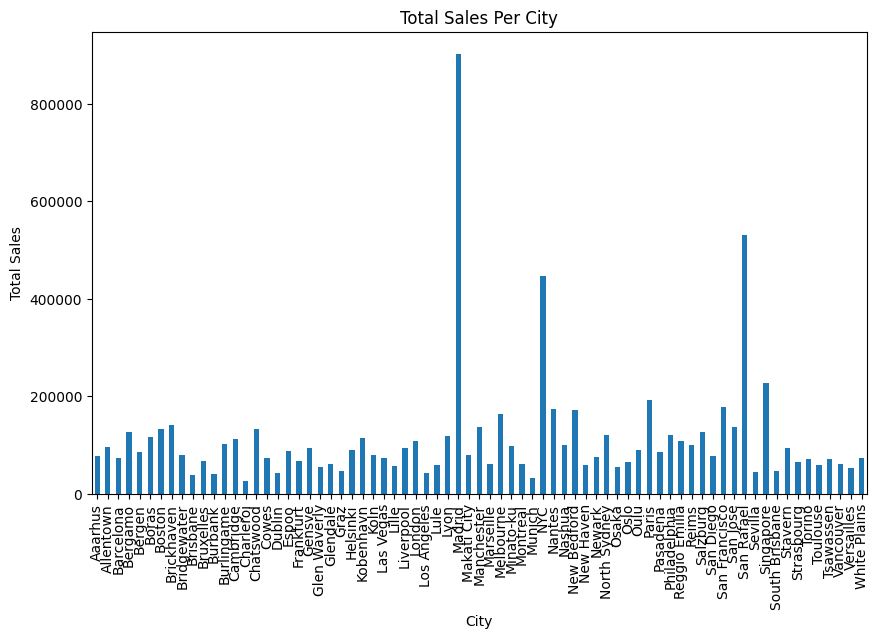

In [22]:
# Task 9: Plot a bar chart showing total sales per city.
city_sales = df.groupby('City')['TotalSales'].sum()
city_sales.plot(kind='bar', figsize=(10, 6))
plt.title("Total Sales Per City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.show()

In [23]:
# Task 10: Save the dataframe in a new file with the name 'modified_sales_data.csv'.
df.to_csv('modified_sales_data.csv', index=False)